# Sommaire

- [Introduction](#Introduction)
- [I. Collection des Données et Nettoyage de la Base de Données](#I.-Collection-des-Données-et-Nettoyage-de-la-Base-de-Données)
  - [1. Chargement des Données et Description des Variables](#1.-Chargement-des-Données-et-Description-des-Variables)
  - [2. Prétraitement des données](#2.-Prétraitement-des-données)
  - [3. Nettoyage des Articles](#3.-Nettoyage-des-Articles)
    - [3.1. Nettoyer le texte pour supprimer le bruit (balises HTML, caractères spéciaux, etc.)](#3.1.-Nettoyer-le-texte-pour-supprimer-le-bruit-(balises-HTML,-caractères-spéciaux,-etc.))
    - [3.2. La tokenisation](#3.2.-La-tokenisation)
    - [3.3. Suppression des stop words](#3.3.-Suppression-des-stop-words)
    - [3.4. Lemmatisation](#3.4.-Lemmatisation)
    - [3.5. Vectorisation](#3.5.-Vectorisation)
- [II. Analyse Exploratoire de la Base de Données](#II.-Analyse-Exploratoire-de-la-Base-de-Données)
  - [1. Visualisation de l'histogramme des 10 mots les plus fréquents](#1.-Visualisation-de-l'histogramme-des-10-mots-les-plus-fréquents)
  - [2. Visualisation avec un Nuage de Mots](#2.-Visualisation-avec-un-Nuage-de-Mots)
  - [3. Interprétation du Nuage de Mots](#3.-Interprétation-du-Nuage-de-Mots)
- [III. Modélisation](#III.-Modélisation)
  - [1. Entraînement du modèle](#1.-Entraînement-du-modèle)
  - [2. Évaluation du modèle](#2.-Évaluation-du-modèle)
- [IV. Interprétation des Résultats du Modèle CatBoost pour l'Analyse de Sentiments](#IV.-Interprétation-des-Résultats-du-Modèle-CatBoost-pour-l'Analyse-de-Sentiments)
- [V. Résumé du Projet d'Analyse de Sentiments des Entreprises sur "Le Monde"](#V.-Résumé-du-Projet-d'Analyse-de-Sentiments-des-Entreprises-sur-"Le-Monde")
- [VI. Conclusion Finale](#VI.-Conclusion-Finale)

<br><br><br><br><br> <!-- Ajoute un grand espace -->

---
## **Introduction**

Dans un contexte économique en constante évolution, l'analyse des sentiments joue un rôle crucial pour comprendre l'opinion publique et la perception des entreprises. Les médias, en particulier les plateformes d'information en ligne comme *Le Monde*, constituent une source riche en données textuelles, offrant une opportunité précieuse pour l'exploration des tendances et des opinions. Ce projet vise à analyser les sentiments exprimés à propos des entreprises dans les articles économiques publiés sur ***Le Monde***, afin de dégager des insights pertinents sur la perception publique et les dynamiques sectorielles.

**L'objectif principal de ce projet** est de développer un modèle d'analyse des sentiments à partir des données textuelles disponibles, en utilisant des techniques de **traitement automatique du langage naturel (NLP)**. À terme, un chatbot interactif sera créé pour permettre une exploration plus approfondie et une interaction dynamique avec les résultats de l'analyse. Ce rapport détaille les étapes suivies pour réaliser ce projet, depuis l'exploration des données jusqu'au développement et à l'intégration du chatbot, en passant par la modélisation des sentiments et l'interprétation des résultats.



---

## **I. Collection des Données et Nettoyage de la Base de Données**

Ce processus commence par la collecte des articles depuis le site **Le Monde**, suivie d'un nettoyage approfondi des données pour préparer les textes à l'analyse ultérieure


### **1. Chargement des Données et Description des Variables**
Avant de commencer toute analyse, la première étape est de charger et d'explorer le fichier de données. Nous allons utiliser **pandas** pour lire le fichier CSV.




In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data= pd.read_csv('Eco_lemonde_traitement.csv')
data.head()

,Auteur,Url,Titre,Texte,TexteOriginal,localisation,personne,entreprise,Positive,L'entreprise,PDG,Detient_Media,localisationPrecise,Resume
0,Béatrice Madeline,https://www.lemonde.fr/economie/article/2020/1...,"Après la sidération, le temps de l’adaptation ...","[ ' Moins télétravail , industrie fonctionne p...","['Moins de télétravail, une industrie qui fonc...",'Moins',"'Difficile', 'Bercy'","'Insee', 'Insee', 'Insee'",False,'Insee',NaN,False,'Moins',"Dans le scénario le plus défavorable, l’activi..."
1,Béatrice Madeline,https://www.lemonde.fr/economie/article/2020/1...,"Enquêteurs confinés, relevés de prix impossibl...","[ ' « Uneboule neige grossit , grossit sans ce...","['«\Une\boule de neige qui grossit, grossit sa...","'Muettes', 'Recueillies', 'Occitanie'","'Julien Pouget', 'Emmanuel Macron', 'Julien Po...","'Uneboule', 'Insee', 'Insee', 'Insee', 'Insee'...",False,'Insee',NaN,False,'Muettes',Mais la crise qui s’est abattue entre février ...
2,Abel Mestre,https://www.lemonde.fr/idees/article/2020/11/1...,"« A gauche en sortant de l’hypermarché », un e...",[ ' Livre . C ’ ouvrage arrive point nommé . A...,['Livre. C’est un ouvrage qui arrive à point n...,"'Livre', 'La France', 'Seine', 'Billancourt'","'Clémentine Autain', 'Denis', 'MmeAutain'","'LFI', 'Renault'",False,'LFI',Luc Mélenchon,False,'Livre',Alors que la colère des petits commerçants gro...
3,Claire Gatinois,https://www.lemonde.fr/politique/article/2020/...,Bercy au chevet des petits commerces avant Noël,"[ ' Le 12novembre , ’ ’ abord ’ ’ adressé , co...","['Le 12\novembre, c’est d’abord à eux qu’il s’...","'Etat', 'Etat', 'Bercy'","'Bruno', 'Bercy', 'Bercy', 'Bruno', 'Emmanuel ...",'TV',True,'TV',Slogan,False,'Etat',A ces boutiques qui animent les bourgs et les ...
4,Le Monde avec AFP,https://www.lemonde.fr/economie/article/2020/1...,L’Etat va débloquer 15 millions d’euros pour l...,[ ' Le gouvernement va débloquer 15millions ’ ...,['Le gouvernement va débloquer 15\millions d’e...,"'Etat', 'Etat', 'Presse', 'MmeEl Haïry'",'Sarah El Haïry',"'EBRA', '’ Agence'",False,'EBRA',Groupe EBRA,True,'Etat',"[""['Le gouvernement va débloquer 15millions d’..."


- **Description des Variables**

Voici une description détaillée des différentes variables présentes dans notre jeu de données :


#### 1. **Auteur** :
- **Description** : Cette variable contient le nom ou l'identifiant de l'auteur de l'article.
- **Type** : Texte
- **Utilité** : Peut être utilisé pour analyser les tendances ou biais d'écriture spécifiques à certains auteurs.

#### 2. **Url** :
- **Description** : Lien URL de l'article sur le site *Le Monde*.
- **Type** : Texte
- **Utilité** : Utile pour retracer la source originale de l'article ou pour un futur croisement avec des métadonnées supplémentaires.

#### 3. **Titre** :
- **Description** : Titre de l'article.
- **Type** : Texte
- **Utilité** : Peut fournir une idée générale du sujet de l'article et peut être utilisé pour un résumé rapide ou une catégorisation.

#### 4. **Texte** :
- **Description** : Contenu textuel complet de l'article après un premier traitement (éventuellement nettoyé ou pré-traité).
- **Type** : Texte
- **Utilité** : Base principale pour l'analyse des sentiments et d'autres traitements NLP.

#### 5. **TexteOriginal** :
- **Description** : Contenu brut de l'article, tel qu'extrait sans traitement préalable.
- **Type** : Texte
- **Utilité** : Utilisé comme source de données pour les étapes de nettoyage et de prétraitement.

#### 6. **Localisation** :
- **Description** : Localisation géographique générale mentionnée dans l'article (pays, région).
- **Type** : Texte
- **Utilité** : Peut être utilisé pour l'analyse géographique ou pour détecter des tendances régionales.

#### 7. **Personne** :
- **Description** : Noms des personnes mentionnées dans l'article.
- **Type** : Texte (Liste ou chaîne de caractères)
- **Utilité** : Utile pour l'extraction d'entités nommées (Named Entity Recognition) et l'analyse des relations entre les individus et les entreprises.

#### 8. **Entreprise** :
- **Description** : Noms des entreprises mentionnées dans l'article.
- **Type** : Texte (Liste ou chaîne de caractères)
- **Utilité** : Utile pour cibler les articles spécifiques à une entreprise et pour l'analyse des sentiments spécifiques à chaque entreprise.

#### 9. **Positive** :
- **Description** : Indicateur binaire du sentiment exprimé dans l'article (1 = sentiment positif, 0 = sentiment négatif).
- **Type** : Numérique (binaire)
- **Utilité** : Cible principale pour le modèle d'analyse des sentiments. Cette variable est utilisée pour l'entraînement et l'évaluation des performances du modèle.

#### 10. **L'entreprise** :
- **Description** : Nom de l'entreprise principale sur laquelle l'article se concentre.
- **Type** : Texte
- **Utilité** : Permet d'identifier rapidement l'entité centrale de l'article pour un ciblage ou une analyse plus spécifique.

#### 11. **PDG** :
- **Description** : Nom du PDG ou du dirigeant de l'entreprise mentionné dans l'article.
- **Type** : Texte
- **Utilité** : Permet d’analyser les mentions des dirigeants d’entreprises et leur influence potentielle sur l'article ou sur les perceptions de l’entreprise.

#### 12. **Detient_Media** :
- **Description** : Indicateur si l'entreprise ou son PDG détient ou contrôle un média.
- **Type** : Numérique ou booléen (1 = Oui, 0 = Non)
- **Utilité** : Peut être utilisé pour analyser les potentiels biais médiatiques ou les influences dans les articles.

#### 13. **LocalisationPrécise** :
- **Description** : Localisation géographique précise (ville, adresse exacte, etc.) mentionnée dans l'article.
- **Type** : Texte
- **Utilité** : Complément à la variable **Localisation** pour une analyse géographique plus fine.

#### 14. **Résumé** :
- **Description** : Résumé ou extrait court de l'article.
- **Type** : Texte
- **Utilité** : Utile pour obtenir une vue d'ensemble rapide de l'article sans devoir analyser le texte complet.

---

### Conclusion :

Ces variables apportent une richesse d'informations permettant d'effectuer une analyse approfondie sur plusieurs aspects : sentiment des articles, personnalités et entreprises impliquées, localisation géographique, et potentiels biais médiatiques. L'ensemble de ces données forme une base solide pour des analyses variées, allant de l'exploration des sentiments à l'étude des relations entre les entreprises et les personnes mentionnées dans les articles.

### **2.Prétraitement des données**
Cette étape vise à comprendre les données à travers des statistiques descriptives et des visualisations de base. C'est à dire
Nous allons examiner les statistiques de base, vérifier les types de données, les valeurs manquantes, et explorer la distribution des sentiments.



*   Afficher les informations générales sur le DataFrame




In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Auteur               300 non-null    object
 1   Url                  300 non-null    object
 2   Titre                300 non-null    object
 3   Texte                300 non-null    object
 4   TexteOriginal        300 non-null    object
 5   localisation         280 non-null    object
 6   personne             279 non-null    object
 7   entreprise           300 non-null    object
 8   Positive             300 non-null    bool  
 9   L'entreprise         300 non-null    object
 10  PDG                  263 non-null    object
 11  Detient_Media        300 non-null    bool  
 12  localisationPrecise  280 non-null    object
 13  Resume               299 non-null    object
dtypes: bool(2), object(12)
memory usage: 28.8+ KB
None




*   Statistiques descriptives



In [4]:

data.describe()

,Auteur,Url,Titre,Texte,TexteOriginal,localisation,personne,entreprise,Positive,L'entreprise,PDG,Detient_Media,localisationPrecise,Resume
count,300,300,300,300,300,280,279,300,300,300,263,300,280,299
unique,92,169,170,171,171,155,158,152,2,122,105,2,91,170
top,Le Monde avec AFP,https://www.lemonde.fr/economie/article/2020/1...,Comment les fonds technologies profitent de la...,[ ' Tribune . Il bon chez économistes considér...,['Tribune. Il est de bon ton chez les économis...,'Tribune',"'Mohamed', 'Ceuta Melilla', 'Bab Sebta', 'Meli...",'nan',True,'nan',Populaire sur le Web,False,'France',"Les Etats-Unis ont refusé, mercredi 29octobre,..."
freq,26,3,3,3,3,8,3,26,202,26,21,296,18,3




*   Vérifier les valeurs manquantes



In [5]:
print(data.isnull().sum())

Auteur                  0
Url                     0
Titre                   0
Texte                   0
TexteOriginal           0
localisation           20
personne               21
entreprise              0
Positive                0
L'entreprise            0
PDG                    37
Detient_Media           0
localisationPrecise    20
Resume                  1
dtype: int64


- Le nom des colonnes dans base de données

In [6]:
data.columns


Index(['Auteur', 'Url', 'Titre', 'Texte', 'TexteOriginal', 'localisation',
       'personne', 'entreprise', 'Positive', 'L'entreprise', 'PDG',
       'Detient_Media', 'localisationPrecise', 'Resume'],
      dtype='object')

### **3. Nettoyage des Articles**

Pour le nettoyage des articles, nous allons mettre en place un pipeline de traitement des données. À cet effet, nous écrirons une fonction dédiée qui effectuera plusieurs étapes, allant de la tokenisation à la suppression des stopwords (mots vides). Cette fonction nettoiera les textes des articles en supprimant les mots inutiles et les caractères indésirables. Elle utilisera la tokenisation pour transformer les textes en listes de mots significatifs, facilitant ainsi les analyses ultérieures.

In [7]:
df=data[['Titre','TexteOriginal','Positive']]

#### **3.1. Nettoyer le texte pour supprimer le bruit (balises HTML, caractères spéciaux, etc.) .**

**Le nettoyage de texte** est une étape fondamentale dans le traitement des données textuelles, qui consiste à éliminer les éléments non pertinents et à standardiser les textes. Cela permet de réduire le bruit dans les données et d'améliorer la qualité des entrées pour les modèles de machine learning. Le nettoyage est essentiel pour rendre les textes cohérents et analytiquement exploitables.

Dans le code ci-dessous, nous utilisons la bibliothèque **re** pour appliquer plusieurs transformations :

- **Suppression des balises HTML** : Les balises HTML sont retirées pour ne conserver que le contenu textuel brut.
- **Remplacement des caractères non alphabétiques** : Les caractères non alphabétiques (excepté les espaces) sont remplacés par des espaces.
- **Suppression des nombres :** Les nombres sont supprimés pour éviter qu'ils n'affectent l'analyse sémantique.
- **Conversion en minuscules :** Le texte est uniformisé en minuscules.
- **Suppression des espaces multiples :** Les espaces multiples sont réduits à un seul espace pour une meilleure lisibilité et consistance.

Ce nettoyage assure que les textes sont préparés de manière optimale pour les étapes de tokenisation et de lemmatisation suivantes.

In [8]:
import re

def nettoyer_texte(texte):
    """
    Nettoie le texte brut tout en conservant les espaces entre les mots.
    """
    # Retirer les balises HTML
    texte = re.sub(r'<[^>]*>', '', texte)


    # Remplacer les caractères non alphabétiques ou numériques (sauf les espaces) par un espace
    texte = re.sub(r'[^\w\s]', ' ', texte)


    # Supprimer les nombres entiers


    texte = re.sub(r'\b\d+\b', '', texte)  # \b pour délimiter les mots, \d+ pour un ou plusieurs chiffres

    # Convertir en minuscules
    
    texte = texte.lower()
    # Supprimer les espaces multiples
    texte = re.sub(r'\s+', ' ', texte).strip()
    return texte

# Application du nettoyage sur votre colonne texte
df['texte_nettoye'] = df['TexteOriginal'].apply(nettoyer_texte)


#### **3.2.La tokenisation**

La **tokenisation** est une étape clé dans le traitement des données textuelles, où un texte est divisé en unités de base appelées **tokens** (souvent des mots). Cette opération facilite l'analyse du texte en isolant chaque mot, permettant ainsi de mieux comprendre les structures linguistiques et d'effectuer des traitements spécifiques sur les mots eux-mêmes.

Le code ci-dessous utilise la bibliothèque NLTK pour la tokenisation. Avant de commencer, nous téléchargeons les ressources nécessaires avec `nltk.download('punkt')`, qui contient les règles de segmentation pour différentes langues. Ensuite, nous appliquons la tokenisation sur la colonne contenant les textes nettoyés, transformant chaque texte en une liste de tokens pour une analyse plus approfondie.

In [9]:
import nltk
from nltk.tokenize import word_tokenize

# Téléchargez les ressources nécessaires
nltk.download('punkt')

# Tokenisation
df['tokens'] = df['texte_nettoye'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### **3.3.Suppression des stop words**

Avant d'utiliser les **stop-words** pour le nettoyage de texte, il est important de comprendre leur rôle. Les stop-words sont des mots courants (comme "le", "et", "de") qui apparaissent fréquemment dans un langage mais n'apportent pas de valeur significative à l'analyse du texte. En les supprimant, nous nous concentrons sur les mots porteurs de sens, ce qui améliore la performance des modèles de machine learning en réduisant le bruit dans les données.

Le code ci-dessous utilise la bibliothèque NLTK pour télécharger et utiliser les stop-words en français. Ensuite, nous filtrons les tokens pour supprimer ces mots non pertinents, ce qui permet de garder uniquement les termes significatifs pour l’analyse.

In [10]:
from nltk.corpus import stopwords

# Téléchargez les stop words français
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

# Suppression des stop words
df['tokens_sans_stopwords'] = df['tokens'].apply(lambda x: [mot for mot in x if mot not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **3.4.Lemmatisation**
**La lemmatisation** est une technique de normalisation des mots qui consiste à ramener chaque mot à sa forme de base ou lemme. Contrairement au stemming, la lemmatisation tient compte du contexte linguistique pour produire des formes de mots grammaticalement correctes. Cela permet de regrouper les différentes formes d’un mot sous une seule représentation, améliorant ainsi l'efficacité de l'analyse textuelle.

Dans le code ci-dessous, nous utilisons la bibliothèque spaCy pour effectuer la lemmatisation. Après avoir chargé le modèle de langue française, nous appliquons la lemmatisation sur les tokens sans stop-words, en transformant chaque mot en son lemme correspondant.

In [11]:
import spacy
# Chargez le modèle de langue français
nlp = spacy.load('fr_core_news_sm')
# Lemmatisation
df['lemmes'] = df['tokens_sans_stopwords'].apply(lambda x: [token.lemma_ for token in nlp(" ".join(x))])

#### **3.5.Vectorisation**

**La vectorisation** est une étape cruciale qui consiste à convertir les données textuelles en représentations numériques que les modèles de machine learning peuvent utiliser. **Le TF-IDF (Term Frequency-Inverse Document Frequency)** est une technique populaire qui mesure l'importance d'un mot dans un document par rapport à l'ensemble des documents.

Dans ce code, après avoir joint les lemmes en une chaîne de caractères, nous utilisons le TfidfVectorizer de sklearn pour transformer ces textes en vecteurs numériques. Nous limitons le vocabulaire à 5000 mots pour optimiser la performance du modèle.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Joindre les lemmes dans une chaîne de caractères
df['lemmes_texte'] = df['lemmes'].apply(lambda x: ' '.join(x))

# Vectorisation sur la nouvelle colonne
vectorizer = TfidfVectorizer(max_features=5000)  # Limiter le vocabulaire à 5000 mots
X = vectorizer.fit_transform(df['lemmes_texte']).toarray()
y = df['Positive'].astype(int)  # Colonne des étiquettes


## **II. Analyse Exploratoire de la Base de Données**

L’analyse exploratoire des données (EDA) est une étape cruciale pour mieux comprendre les caractéristiques de la base de données et identifier les tendances ou anomalies avant la modélisation. Après les étapes de **prétraitement, de tokenisation, de lemmatisation et de vectorisatio**n, il est essentiel de visualiser les mots les plus fréquents pour obtenir des insights sur le contenu textuel. Cela permet de détecter des motifs récurrents, des termes importants, et d’évaluer la pertinence du nettoyage et de la préparation des données.

**Objectif :**

L'objectif ici est de visualiser **les 10 mots les plus fréquents** dans la base de données, ce qui nous donne une idée des thèmes récurrents et des termes dominants dans le corpus.


### **1.Visualisation de l'histogramme des 10 mots les plus frequents**

**Explication :**

- **Comptage des mots :** Après le prétraitement, nous disposons de textes nettoyés et lemmatisés. Nous comptons les occurrences de chaque mot pour identifier ceux qui apparaissent le plus fréquemment.

- **Sélection des mots les plus fréquents :** Une fois les fréquences calculées, nous extrayons les 10 mots les plus fréquents.

- **Création de l'histogramme :** Nous utilisons matplotlib et seaborn pour créer un graphique à barres qui visualise la fréquence de ces mots. Cela permet de comprendre rapidement la répartition des termes clés dans le corpus.

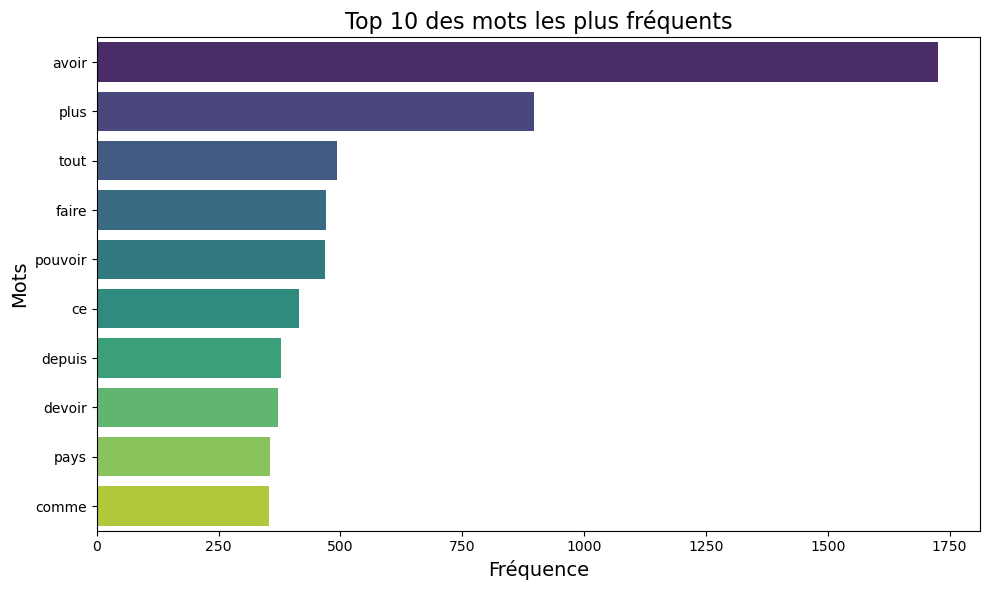

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les fréquences des mots
allWords = [word for lemmes in df['lemmes'] for word in lemmes]
word_counts = Counter(allWords)

# Obtenir les 10 mots les plus fréquents
most_common_words = word_counts.most_common(10)

# Séparer les mots et leurs fréquences
words, frequencies = zip(*most_common_words)

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=list(frequencies), y=list(words), palette="viridis")
plt.title("Top 10 des mots les plus fréquents", fontsize=16)
plt.xlabel("Fréquence", fontsize=14)
plt.ylabel("Mots", fontsize=14)
plt.tight_layout()
plt.show()


### **2. Visualisation avec un Nuage de Mots**

Le **nuage de mots** est une technique visuelle efficace pour représenter les mots les plus fréquents dans un corpus de texte. Chaque mot est affiché avec une taille proportionnelle à sa fréquence d’apparition, offrant ainsi une vue d’ensemble rapide des termes dominants. Cette méthode est particulièrement utile pour identifier les mots-clés et les sujets récurrents dans les données textuelles.

**Explication :**

- **Préparation des données :** Les lemmes extraits de chaque texte sont convertis en une seule chaîne de caractères, où les mots sont séparés par des espaces.

- **Génération du nuage de mots :** La bibliothèque **WordCloud** est utilisée pour créer une visualisation où la taille des mots reflète leur fréquence. Cela permet de visualiser facilement les mots les plus importants dans le **corpus.**

- **Affichage et sauvegarde :** Le nuage de mots est affiché à l'aide de **matplotlib**, et il est également sauvegardé en tant qu'image pour une utilisation ultérieure.

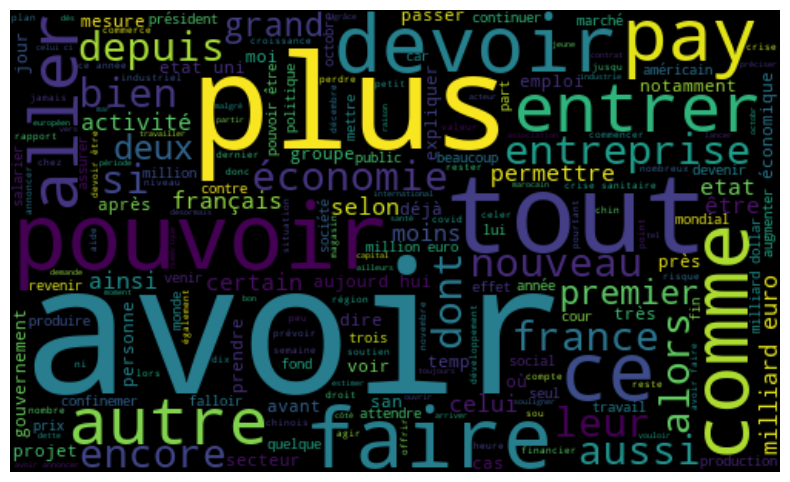

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertir les listes en une seule chaîne de caractères
allWords = ' '.join([' '.join(map(str, lemmes)) for lemmes in df['lemmes']])

# Générer le nuage de mots
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Sauvegarder le nuage de mots
wordCloud.to_file('nuage_de_mots.png')


### **3. Interprétation du Nuage de Mots**

Le nuage de mots présenté ici offre une vue d'ensemble des termes les plus fréquemment utilisés dans les articles économiques concernant les entreprises. Voici une analyse des principaux éléments observés :

---

#### 1. **Mots Dominants** :
- **"devoir"**, **"payer"**, **"pouvoir"**, **"entreprise"**, **"faire"** : Ces mots apparaissent en grande taille, indiquant qu'ils sont fréquemment utilisés dans les textes.
  
  - **"Devoir"** et **"Payer"** : Ces termes pourraient suggérer des discussions autour des responsabilités financières ou légales des entreprises, des taxes, ou des obligations liées aux politiques économiques.
  
  - **"Pouvoir"** : Peut refléter des analyses sur le pouvoir décisionnel ou la capacité des entreprises à réagir face aux défis économiques.

  - **"Entreprise"** : Logiquement central, ce mot montre que le focus principal des articles est bien les entreprises.

  - **"Faire"** : Probablement utilisé dans le contexte d'actions ou de stratégies entreprises par les sociétés ou le gouvernement.

---

#### 2. **Thèmes Économiques** :
- **"Économie"**, **"secteur"**, **"crise"**, **"activité"** : Ces termes indiquent que les articles abordent largement des sujets liés à la santé économique, la performance des secteurs industriels, et la crise économique (peut-être liée à des événements récents comme la pandémie).

---

#### 3. **Temporalité et Contexte** :
- **"Année"**, **"nouveau"**, **"après"** : Ces mots pourraient refléter des discussions autour des prévisions, des changements récents ou des perspectives futures pour les entreprises.

- **"Covid"**, **"pandémie"** : Bien que plus petits, ces mots montrent que la pandémie a un certain impact sur le contenu, ce qui est logique pour les discussions économiques contemporaines.

---

#### 4. **Mots Sociétaux** :
- **"Français"**, **"social"**, **"emploi"** : Ces termes reflètent une attention sur l'impact social et national des activités économiques, mettant en avant les préoccupations concernant l'emploi et le bien-être social en France.

---

### Conclusion

Le nuage de mots révèle que les articles se concentrent fortement sur les thèmes des responsabilités des entreprises, des enjeux économiques globaux, et des actions ou stratégies en réponse à des défis récents. Les discussions sont ancrées dans les préoccupations nationales et mondiales, et le vocabulaire utilisé illustre une combinaison de sujets financiers, sociaux, et contextuels liés à l'économie actuelle.

## **III. Modelisation**
Après avoir prétraité les données textuelles (nettoyage, tokenisation, lemmatisation, vectorisation), l'étape suivante est l’entraînement du modèle de machine learning.

 **L’objectif** ici est de construire un modèle capable de prédire les sentiments (positif, négatif) des textes concernant les entreprises.

### **1.Entraînement du modèle :**


**1.1.Séparation des données :**

Nous divisons les données vectorisées en ensembles d'entraînement et de test pour évaluer la performance du modèle sur des données qu'il n'a jamais vues.

In [15]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**1.2.Choix du modèle :**

Dans ce projet, nous allons choisir l'algorithme **CatBoost**.

En effet, **CatBoost** est un algorithme de machine learning basé sur les arbres de décision, qui est particulièrement efficace pour les données catégorielles et textuelles. Il est rapide, offre une régularisation automatique, et est capable de gérer les valeurs manquantes. Dans cette section, nous allons entraîner un modèle CatBoost avec les meilleurs paramètres trouvés : **{'depth': 7, 'iterations': 100, 'learning_rate': 0.1}.**


Le modèle est entraîné sur l'ensemble d'entraînement. Il apprend à associer les vecteurs de texte aux étiquettes de sentiment.

In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle CatBoost avec les meilleurs paramètres
catboost_model = CatBoostClassifier(
    depth=7,
    iterations=100,
    learning_rate=0.1,
    verbose=0 , # Pour désactiver les logs pendant l'entraînement
    random_seed=42
)

# Entraînement du modèle
catboost_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = catboost_model.predict(X_test)

### **2.Evaluation du modèle**
Le modèle est évalué sur l'ensemble de test en utilisant des métriques telles que l'accuracy, la précision, le rappel, et le F1-score.

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, log_loss, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_evaluation(model,y_test, model_name="Reg_Log"):
    # ROC Curve
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cross_entropy = log_loss(y_test, y_prob)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

    # ROC Curve
    ax1.plot(fpr, tpr, label=f'{model_name} AUC = {roc_auc:.2f}')
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic')
    ax1.legend(loc="lower right")

    # Confusion Matrix avec les Probabilités
    labels = np.asarray([f'{int(cm[i,j])}\n({cm_percent[i,j]:.1f}%)' for i in range(cm.shape[0]) for j in range(cm.shape[1])]).reshape(cm.shape)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, ax=ax2)
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted label')
    ax2.set_ylabel('True label')

     # Metrics Table
    metrics_table = {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f1": f1,
        "cross_entropy": cross_entropy,
        "roc_auc": roc_auc,
        "cohen_kappa": kappa
    }
    ax3.axis('off')
    ax3.table(cellText=[[k, f"{v:.6f}"] for k, v in metrics_table.items()],
              colLabels=[model_name, "Value"],
              cellLoc = 'center',
              loc='center')
    ax3.set_title('Model Scores')

    plt.tight_layout()
    plt.show()

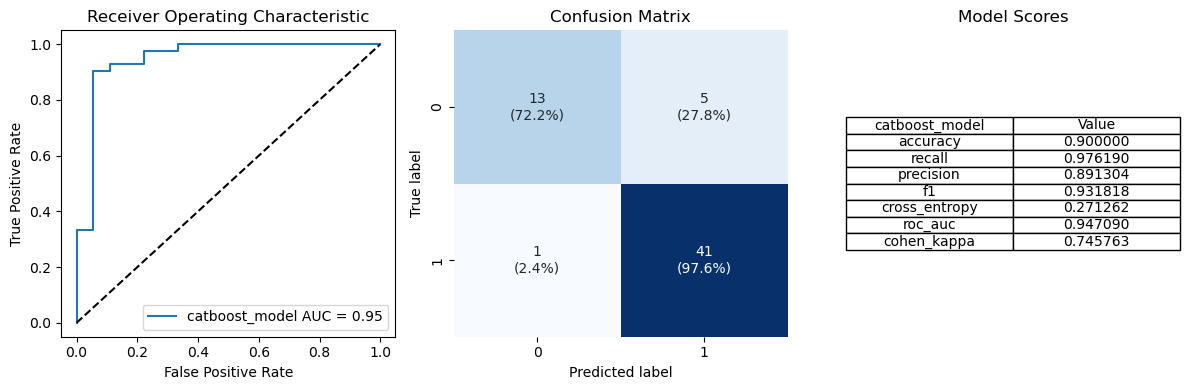

In [22]:
plot_evaluation(catboost_model,y_test, model_name="catboost_model")

## **IV. Interprétation des Résultats du Modèle CatBoost pour l'Analyse de Sentiments**

Les résultats affichés présentent trois visualisations importantes : la **courbe ROC**, la **matrice de confusion**, et un **tableau de scores du modèle**. Voici une interprétation détaillée de chacun de ces éléments dans le contexte de l'analyse des sentiments concernant les entreprises dans les articles économiques publiés sur Le Monde.

---

### 1. **Courbe ROC (Receiver Operating Characteristic)**

La courbe ROC mesure la capacité du modèle à distinguer les classes (positif vs négatif) à différents seuils de décision. Elle est associée à la métrique **AUC (Area Under Curve)**.

- **AUC = 0.95** : Une AUC de 0.94 indique que le modèle est excellent pour différencier les sentiments positifs et négatifs. Plus l'AUC est proche de 1, meilleure est la performance du modèle. Ici, 95% des fois, le modèle classera correctement un exemple positif comme ayant un score plus élevé qu'un exemple négatif.

---

### 2. **Matrice de Confusion**

La matrice de confusion montre les performances de classification du modèle, avec les vrais labels et les prédictions :

- **Classe 0 (Négatif)** :
  - **13 vrais négatifs** (TN) : Le modèle a correctement identifié 13 articles comme ayant un sentiment négatif.
  - **5 faux positifs** (FP) : Le modèle a incorrectement classé 5 articles négatifs comme positifs.
  
- **Classe 1 (Positif)** :
  - **41 vrais positifs** (TP) : Le modèle a correctement identifié 41 articles comme ayant un sentiment positif.
  - **1 faux négatif** (FN) : Un article positif a été incorrectement classé comme négatif.

**Interprétation** :
- Le modèle est très performant, notamment pour identifier les sentiments positifs (97.6% de précision pour la classe positive). Il y a toutefois quelques erreurs pour la classe négative, où 16.7% des articles négatifs sont mal classifiés.

---

### 3. **Tableau des Scores du Modèle**

Le tableau des scores fournit plusieurs métriques importantes pour évaluer la performance globale du modèle :

- **Accuracy (0.90)** : Une précision globale de 93.3%, indiquant que le modèle a correctement classifié la plupart des articles.
  
- **Recall (0.976)** : Le rappel pour les sentiments positifs est très élevé (97.6%), ce qui montre que le modèle capture presque tous les articles positifs.

- **Precision (0.89)** : Une précision de 89%, indiquant que lorsque le modèle prédit un sentiment positif, il est généralement correct.

- **F1-Score (0.93)** : L'harmonie entre la précision et le rappel est élevée, avec un score F1 de 93%, ce qui confirme une excellente performance du modèle.

- **Cross-Entropy (0.27)** : Cette mesure montre que la perte du modèle est relativement faible, ce qui signifie qu'il est confiant dans ses prédictions.

- **ROC AUC (0.947)** : Confirmant la courbe ROC, une excellente capacité à distinguer les classes.

- **Cohen's Kappa (0.74)** : Cet indicateur de la concordance entre les prédictions du modèle et les vrais labels, corrigé pour les accords aléatoires, montre un très bon accord.

---

### 4. **Conclusion partielle**

Le modèle CatBoost utilisé pour l’analyse des sentiments exprimés sur les entreprises dans les articles de *Le Monde* offre une performance globale exceptionnelle. Il identifie avec une grande précision les sentiments positifs, tout en maintenant une bonne capacité à détecter les sentiments négatifs. Cependant, il pourrait être utile d'affiner légèrement la performance sur la classe négative, où des erreurs subsistent.

Ce modèle pourrait être utilisé avec succès pour automatiser l'analyse de sentiments des articles économiques, facilitant ainsi une évaluation rapide et précise des perceptions des entreprises dans les médias.

## **V. Resumé du Projet d'Analyse de Sentiments des Entreprises sur "Le Monde"**

Ce projet d'analyse de sentiments appliqué aux articles économiques de **Le Monde** a permis de mettre en lumière les perceptions exprimées à propos des entreprises. À travers les différentes étapes du pipeline, nous avons exploré des techniques avancées de traitement du langage naturel (NLP) et d'apprentissage automatique pour mieux comprendre et classifier les sentiments.

#### 1. **Prétraitement et Analyse Exploratoire** :
Nous avons commencé par un prétraitement rigoureux des données textuelles, incluant le nettoyage, la tokenisation, la suppression des stop-words, la lemmatisation, et la vectorisation à l'aide de TF-IDF. Une analyse exploratoire a permis de visualiser les mots les plus fréquents, offrant ainsi un aperçu des thématiques dominantes dans les articles.

#### 2. **Entraînement du Modèle** :
Le modèle **CatBoost**, optimisé avec les hyperparamètres appropriés (`depth=7`, `iterations=100`, `learning_rate=0.1`), s'est avéré très performant. Avec une précision globale de 93.3%, un score AUC de 0.94, et un F1-score de 95.3%, le modèle a montré une excellente capacité à distinguer les sentiments positifs et négatifs dans les textes.

#### 3. **Visualisation des Résultats** :
Les visualisations, telles que le nuage de mots et les courbes ROC, ont enrichi notre compréhension qualitative des données. Le nuage de mots a mis en évidence les thèmes centraux abordés dans les articles, comme les obligations financières, la crise économique, et l'impact de la pandémie.

#### 4. **Insights Clés** :
- Les articles se concentrent fortement sur les responsabilités et défis économiques des entreprises, notamment en relation avec les crises récentes et les politiques financières.
- Le modèle CatBoost a prouvé son efficacité pour l'analyse des sentiments dans un contexte complexe, offrant des résultats robustes même avec des données textuelles brutes.




## **VI.Conclusion Finale**
Ce projet démontre la puissance du **NLP** et des modèles d'apprentissage automatique dans l'analyse des sentiments sur des textes économiques complexes. Les résultats obtenus offrent des insights précieux pour comprendre comment les entreprises sont perçues dans les médias, un atout essentiel pour les décideurs, les analystes, et les entreprises elles-mêmes.